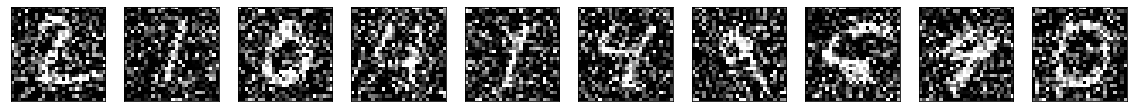

(60000, 784)
(10000, 784)
Epoch 1/25
235/235 [==============================] - 5s 12ms/step - loss: 0.6949 - val_loss: 0.6948
Epoch 2/25
235/235 [==============================] - 2s 7ms/step - loss: 0.6947 - val_loss: 0.6947
Epoch 3/25
235/235 [==============================] - 1s 6ms/step - loss: 0.6946 - val_loss: 0.6945
Epoch 4/25
235/235 [==============================] - 1s 6ms/step - loss: 0.6944 - val_loss: 0.6944
Epoch 5/25
235/235 [==============================] - 1s 6ms/step - loss: 0.6943 - val_loss: 0.6942
Epoch 6/25
235/235 [==============================] - 1s 6ms/step - loss: 0.6941 - val_loss: 0.6941
Epoch 7/25
235/235 [==============================] - 1s 6ms/step - loss: 0.6940 - val_loss: 0.6940
Epoch 8/25
235/235 [==============================] - 1s 5ms/step - loss: 0.6938 - val_loss: 0.6938
Epoch 9/25
235/235 [==============================] - 1s 6ms/step - loss: 0.6937 - val_loss: 0.6937
Epoch 10/25
235/235 [==============================] - 2s 10ms/step - los

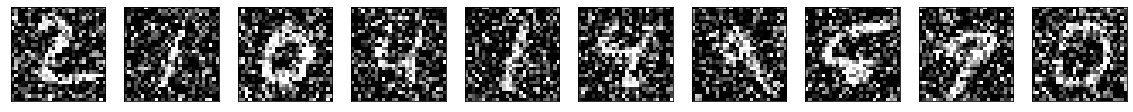

reconstructed output


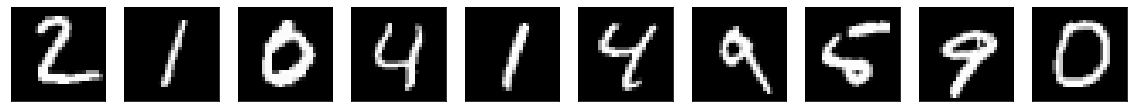

In [1]:
from keras.datasets import mnist
from keras.layers import Input, Dense
from keras.models import Model
import keras
from keras import layers
from keras.callbacks import TensorBoard
import matplotlib.pyplot as plt
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)
n = 10
plt.figure(figsize=(20, 2))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
input_img = keras.Input(shape=(28, 28, 1))
encoding_dim = 32 # 32 floats -> compression of factor 24.5, assuming the input is 784 floats
 
# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)
# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))
# configure our model to use a per-pixel binary crossentropy loss, and the Adadelta optimizer:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

(x_train, _), (x_test, _) = mnist.load_data()
# normalize all values between 0 and 1 and we will flatten the 28x28 images into vectors of size 784.
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print (x_train.shape)
print (x_test.shape)

autoencoder.fit(x_train, x_train,
epochs=25,
batch_size=256,
shuffle=True,
validation_data=(x_test, x_test))
# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

print("original input")
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)
n = 10
plt.figure(figsize=(20, 2))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

 # how many digits we will display

print("reconstructed output")
plt.figure(figsize=(20, 2))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()